In [1]:
import pandas as pd
import numpy as np
import json
import os
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
sns.set_palette("colorblind")

In [3]:
def ns_to_ms(ns):
  return ns / 1_000_000

## Data Loading

In [4]:
pwd = "."
figs_dir = "./figs"
!mkdir -p figs

In [5]:
def read_json(path):
  fp = open(path, 'r')
  nb_stats = json.load(fp)
  fp.close()
  return nb_stats

In [6]:
filepath = "ibtesama_getting-started-with-a-movie-recommendation-system"

modin_path = "../stats_modin/" + filepath + ".json"
pandas_path = "../stats_pandas/" + filepath + ".json"

modin_stats = read_json(modin_path)
pandas_stats = read_json(pandas_path)

assert len(modin_stats['cells']) == len(pandas_stats['cells'])
d = {'Code': [], 'Pandas Time': [], 'Modin Time': []}
for i in range(len(pandas_stats['cells'])):
  pd_cell = pandas_stats['cells'][i]
  modin_cell = modin_stats['cells'][i]
  # The cell that imports is different for the pandas and modin versions
  if "import pandas" not in pd_cell['raw']:
    assert pd_cell['raw'] == modin_cell['raw']
  d['Code'].append(pd_cell['raw'])
  d['Pandas Time'].append(ns_to_ms(pd_cell['total-ns']))
  d['Modin Time'].append(ns_to_ms(modin_cell['total-ns']))

In [7]:
df = pd.DataFrame(d)

## Stats

In [8]:
abs_diff = df['Pandas Time'] - df['Modin Time']
rel_diff = df['Pandas Time'] / df['Modin Time']

In [9]:
abs_diff[abs_diff > 200]

18    115138.167278
22      2124.621116
24      3477.605084
dtype: float64

In [10]:
rel_diff[rel_diff > 1.1]

18     1.475519
19     1.595788
20     2.191169
22    36.306471
24     1.552495
dtype: float64

<AxesSubplot:xlabel='Notebook index', ylabel='Time (ms)'>

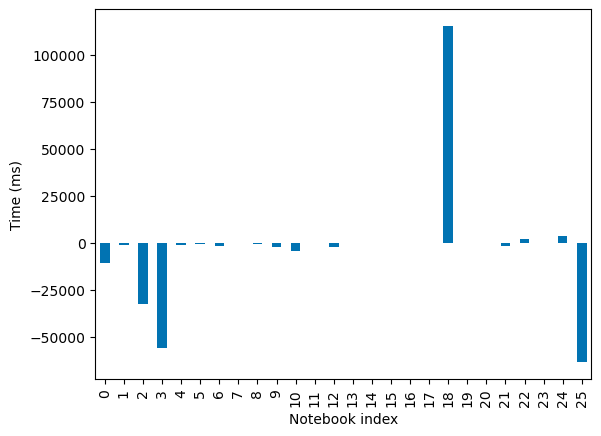

In [11]:
abs_diff.plot(kind='bar', xlabel='Notebook index', ylabel="Time (ms)")

In [12]:
# If we want to check the code of a notebook
print(4)
print(df.iloc[3]['Code'])
print(7)
print(df.iloc[6]['Code'])

4
df2.head(5)
7
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape
